In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np

In [4]:
path = 'C:/Users/Cecilia/Documents/francisco\henry/proyecto_final_2b/datos/lesiones.xlsx'

In [27]:
#df_diccionario_hechos = pd.read_excel(path,sheet_name='DICCIONARIO_HECHOS')
#df_diccionario_victimas = pd.read_excel(path,sheet_name='DICCIONARIO_VICTIMAS')
#df_diccionario_clas = pd.read_excel(path,sheet_name='clas')

In [5]:
df_motos = pd.read_excel(path,sheet_name='HECHOS')

In [6]:
df_motos.head(2)

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD


In [30]:
del df_diccionario_victimas

In [8]:
print(df_motos.shape)
data = df_motos.drop_duplicates(subset='id')
data = df_motos.reset_index(drop=True)
print(df_motos.shape)

(23785, 27)
(23785, 27)


La base de datos df_motos no tiene duplicados

In [9]:
df_motos['victima'].value_counts()

victima
SD                    10733
MOTO                   5461
CICLISTA               2209
AUTO                   2033
PEATON                 2026
TRANSPORTE PUBLICO      678
CAMIONETA               189
TAXI                    182
MOVIL                   100
CAMION                   79
MIXTO                    42
MONOPATIN                28
OTRO                     13
UTILITARIO               12
Name: count, dtype: int64

In [11]:
df_motos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [20]:
df_motos['id']=df_motos['id'].astype(int)

ValueError: invalid literal for int() with base 10: 'LC-2019-0000179'

In [15]:
victims_por_ano = df_motos.groupby('aaaa')['victima'].sum()

In [19]:
accidente_moto = df_motos[[df_motos]['victima']=='CICLISTA']

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\Cecilia\AppData\Local\Temp\ipykernel_11788\4243504698.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  accidente_moto = df_motos[[df_motos]['victima']=='CICLISTA']


TypeError: list indices must be integers or slices, not str

In [16]:
print(victims_por_ano)

aaaa
2019    CICLISTAAUTOSDPEATONAUTOMOTOMOTOAUTOMOTOAUTOAU...
2020    CICLISTACICLISTACICLISTACICLISTACICLISTACICLIS...
2021    CICLISTACICLISTACICLISTACICLISTACICLISTACICLIS...
Name: victima, dtype: object


In [11]:
print(victims_por_ano)

AAAA
2016    146
2017    140
2018    149
2019    104
2020     81
2021     97
Name: N_VICTIMAS, dtype: int64


<span style = 'font_size:16pt;'>Es mejor tener el número de muertos por cada 100.000 habitantes </span>

In [32]:
data_array = np.array([[ '2016', 12.8],
                       [ '2017', 12.7],
                       [ '2018', 12.3],['2019',10.9],['2020',7.3],['2021',8.4],['2022',10.52]])

# Crear un DataFrame a partir del array
df_por_cien_mil = pd.DataFrame(data_array, columns=[ 'anio', 'por_cada_cien_mil'])
print (df_por_cien_mil)

   anio por_cada_cien_mil
0  2016              12.8
1  2017              12.7
2  2018              12.3
3  2019              10.9
4  2020               7.3
5  2021               8.4
6  2022             10.52


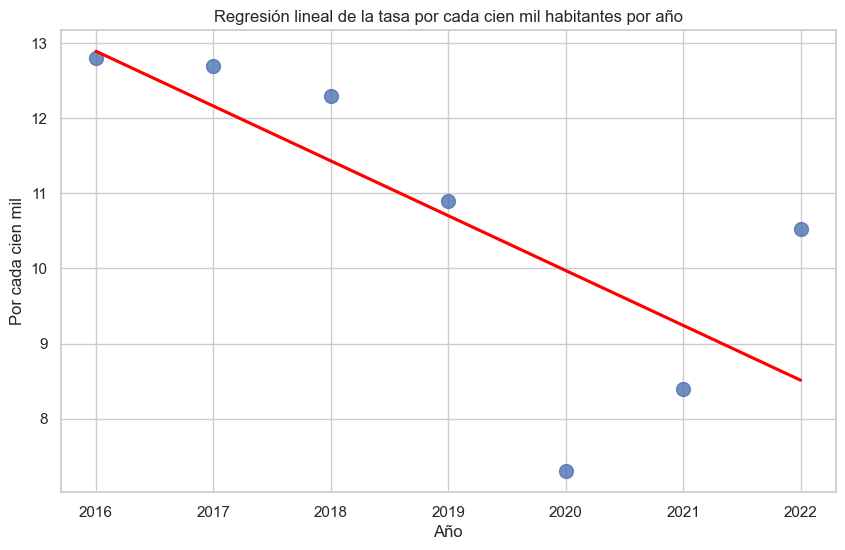

In [33]:
data = {'Anio': [2016, 2017, 2018, 2019, 2020, 2021, 2022],
        'PorCadaCienMil': [12.8, 12.7, 12.3, 10.9, 7.3, 8.4, 10.52]}

# Crear un DataFrame
df = pd.DataFrame(data)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de regresión
plt.figure(figsize=(10, 6))
scatterplot = sns.regplot(x='Anio', y='PorCadaCienMil', data=df, scatter_kws={'s': 100}, ci=None, line_kws={'color': 'red'})

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Por cada cien mil')
plt.title('Regresión lineal de la tasa por cada cien mil habitantes por año')

# Mostrar el gráfico
plt.show()

El gráfico nos muestra una tendencia decreciente en el número de muertos por cada cien mil habitantes que se acentúa en los años 2020 y 2021 debido
a la pandemia pero que se vuelve a retomar en el  2022.</span>

In [36]:
victims_por_comuna = df_hechos.groupby('COMUNA')['N_VICTIMAS'].sum()

In [37]:
victims_por_comuna

COMUNA
0      2
1     93
2     25
3     46
4     79
5     22
6     22
7     62
8     67
9     75
10    30
11    33
12    39
13    40
14    37
15    45
Name: N_VICTIMAS, dtype: int64

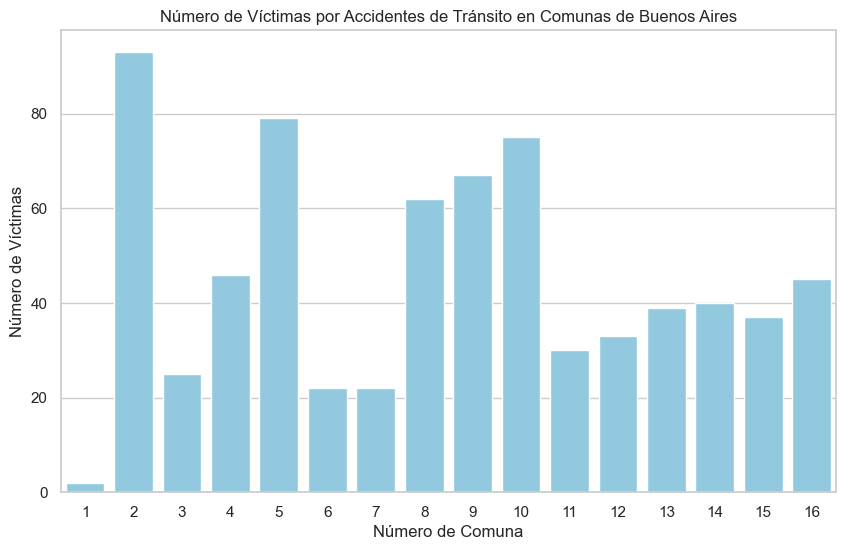

In [39]:
comunas = list(range(1, 17))
victimas_por_comuna = [2, 93, 25, 46, 79, 22, 22, 62, 67, 75, 30, 33, 39, 40, 37, 45]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=comunas, y=victimas_por_comuna, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Número de Comuna')
plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas por Accidentes de Tránsito en Comunas de Buenos Aires')

# Mostrar el gráfico
plt.show()

Tratemos de encontrar algún punto en común entra las comunas 2,5,10 que las hace tan proclives a este tipo de accidente. </span>

In [7]:
df_hechos_recoleta = df_hechos[df_hechos['COMUNA']==2]

In [8]:
print(df_hechos_recoleta)

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
48   2016-0068           1 2016-05-22  2016   5  22  22:00:00  22   
154  2017-0015           1 2017-02-02  2017   2   2  15:18:03  15   
189  2017-0061           1 2017-05-15  2017   5  15  13:29:30  13   
203  2017-0076           1 2017-06-13  2017   6  13  14:50:00  14   
209  2017-0084           1 2017-07-05  2017   7   5  12:49:00  12   
236  2017-0114           1 2017-09-15  2017   9  15  02:30:00   2   
245  2017-0127           1 2017-10-16  2017  10  16  07:45:00   7   
285  2018-0011           1 2018-01-19  2018   1  19  10:30:00  10   
293  2018-0019           1 2018-02-17  2018   2  17  12:30:00  12   
308  2018-0034           1 2018-04-11  2018   4  11  18:15:00  18   
311  2018-0037           1 2018-04-18  2018   4  18  18:45:00  18   
343  2018-0069           1 2018-07-04  2018   7   4  21:45:00  21   
352  2018-0078           1 2018-07-21  2018   7  21  06:15:00   6   
406  2018-0132           1 2018-12

In [11]:
df_hechos_recoleta = df_hechos_recoleta[['N_VICTIMAS','AAAA','HH','VICTIMA']]

In [12]:
df_hechos_recoleta

,N_VICTIMAS,AAAA,HH,VICTIMA
48,1,2016,22,MOTO
154,1,2017,15,PEATON
189,1,2017,13,PEATON
203,1,2017,14,PEATON
209,1,2017,12,PEATON
236,1,2017,2,AUTO
245,1,2017,7,MOTO
285,1,2018,10,PEATON
293,1,2018,12,PEATON
308,1,2018,18,PEATON


In [16]:
df_hechos_recoleta['HH'].mean()

12.52

In [17]:
df_hechos_recoleta.shape

(25, 4)

In [15]:
df_hechos_recoleta['VICTIMA'].value_counts()

VICTIMA
PEATON       14
MOTO          5
AUTO          3
BICICLETA     3
Name: count, dtype: int64

In [18]:
df_hechos_almagro = df_hechos[df_hechos['COMUNA']==5]

In [19]:
df_hechos_almagro.shape

(22, 21)

In [21]:
df_hechos_almagro=df_hechos_almagro[['N_VICTIMAS','AAAA','HH','VICTIMA']]

In [24]:
df_hechos_almagro['VICTIMA'].value_counts()

VICTIMA
PEATON    12
MOTO       9
AUTO       1
Name: count, dtype: int64

In [25]:
df_hechos_almagro['HH'].mean()

14.681818181818182

In [27]:
df_hechos_floresta = df_hechos[df_hechos['COMUNA']==10]

In [28]:
df_hechos_floresta = df_hechos_floresta[['N_VICTIMAS','AAAA','HH','VICTIMA']]

In [30]:
df_hechos_floresta.shape

(29, 4)

In [31]:
df_hechos_floresta['HH'].mean()

11.206896551724139

In [32]:
df_hechos_floresta['VICTIMA'].value_counts()

VICTIMA
MOTO         16
PEATON        7
AUTO          3
BICICLETA     2
PASAJEROS     1
Name: count, dtype: int64

Ecuación de la recta de regresión: y = -0.73x + 1484.57


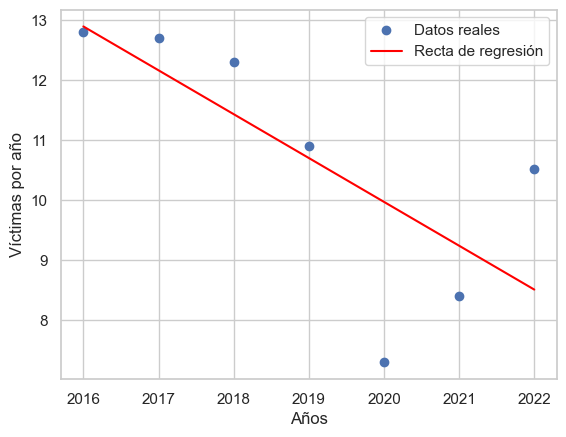

In [35]:

from sklearn.linear_model import LinearRegression


# Supongamos que tienes un DataFrame con columnas 'años' y 'victimas'
# Reemplaza esto con tus datos reales


df = pd.DataFrame(data)

# Prepara los datos para la regresión
X = df[['Anio']]  # Variables independientes (años)
y = df['PorCadaCienMil']  # Variable dependiente (víctimas)

# Inicializa el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajusta el modelo a los datos
modelo_regresion.fit(X, y)

# Obtiene los coeficientes de la recta de regresión
pendiente = modelo_regresion.coef_[0]
intercepto = modelo_regresion.intercept_

# Imprime la ecuación de la recta de regresión
print(f"Ecuación de la recta de regresión: y = {pendiente:.2f}x + {intercepto:.2f}")

# Realiza predicciones usando el modelo
predicciones = modelo_regresion.predict(X)

# Grafica los datos y la recta de regresión
plt.scatter(X, y, label='Datos reales')
plt.plot(X, predicciones, color='red', label='Recta de regresión')
plt.xlabel('Años')
plt.ylabel('Víctimas por año')
plt.legend()
plt.show()